In [82]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt

ff1.plotting.setup_mpl()

# ff1.Cache.enable_cache('cache')



In [83]:
race = ff1.get_session(2021, "Yas Marina", 'R')
quali = ff1.get_session(2021, "Yas Marina", 'Q')


In [84]:
race.load()
laps = race.laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10',

In [85]:
race.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:30:17.345000,Finished,26.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,2.0,2,2.0,NaT,NaT,NaT,0 days 00:00:02.256000,Finished,18.0
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:05.173000,Finished,15.0
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,2B4562,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,,4.0,4,8.0,NaT,NaT,NaT,0 days 00:00:05.692000,Finished,12.0
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,,5.0,5,12.0,NaT,NaT,NaT,0 days 00:00:06.531000,Finished,10.0
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:07.463000,Finished,8.0
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,,7.0,7,3.0,NaT,NaT,NaT,0 days 00:00:59.200000,Finished,6.0
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,,8.0,8,11.0,NaT,NaT,NaT,0 days 00:01:01.708000,Finished,4.0
31,31,E OCON,OCO,ocon,Alpine,0090FF,alpine,Esteban,Ocon,Esteban Ocon,...,,9.0,9,9.0,NaT,NaT,NaT,0 days 00:01:04.026000,Finished,2.0
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,,10.0,10,7.0,NaT,NaT,NaT,0 days 00:01:06.057000,Finished,1.0


In [86]:
fastet_lap = laps.pick_fastest()
print(f'Fastest lap: ', fastet_lap['LapTime'])
print(f'Compound: ', fastet_lap['Compound'])
print(f'Driver: ', fastet_lap['Driver'])

Fastest lap:  0 days 00:01:26.103000
Compound:  HARD
Driver:  VER


In [87]:
laps_driver1 = laps.pick_driver('HAM')
laps_driver2 = laps.pick_driver('VER')

In [88]:
print(laps_driver1['LapNumber'].max())
print(laps_driver2['LapNumber'].max())

58.0
58.0


In [101]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

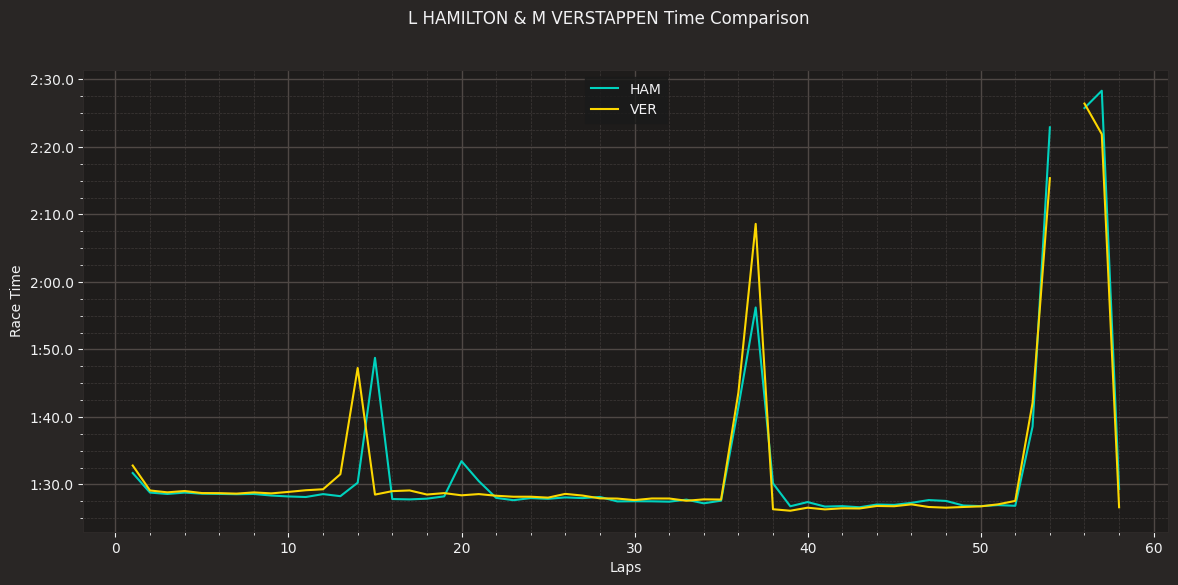

In [102]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
fig.suptitle(race.get_driver('HAM').BroadcastName + " & " + race.get_driver('VER').BroadcastName + " Time Comparison")

ax.plot(laps_driver1['LapNumber'], laps_driver1['LapTime'], label='HAM', color=mer_color)
ax.plot(laps_driver2['LapNumber'], laps_driver2['LapTime'], label='VER', color=rbr_color)
ax.set(ylabel='Race Time', xlabel='Laps')
ax.legend(loc='upper center')
plt.show()

In [90]:
ver_lap = laps.pick_driver('VER')
ham_lap = laps.pick_driver('HAM')

ver_lastlap = ver_lap[ver_lap.LapNumber==58]
ham_lastlap = ham_lap[ham_lap.LapNumber==58]

print(f'''Hamilton's lap time on the last lap. ''', ham_lastlap.LapTime)
print(f'''Verstappen's lap time on the last lap''', ver_lastlap.LapTime)

Hamilton's lap time on the last lap.  632   0 days 00:01:29.330000
Name: LapTime, dtype: timedelta64[ns]
Verstappen's lap time on the last lap 516   0 days 00:01:26.618000
Name: LapTime, dtype: timedelta64[ns]


In [91]:
ver_tel = ver_lastlap.get_car_data().add_distance()
ham_tel = ham_lastlap.get_car_data().add_distance()

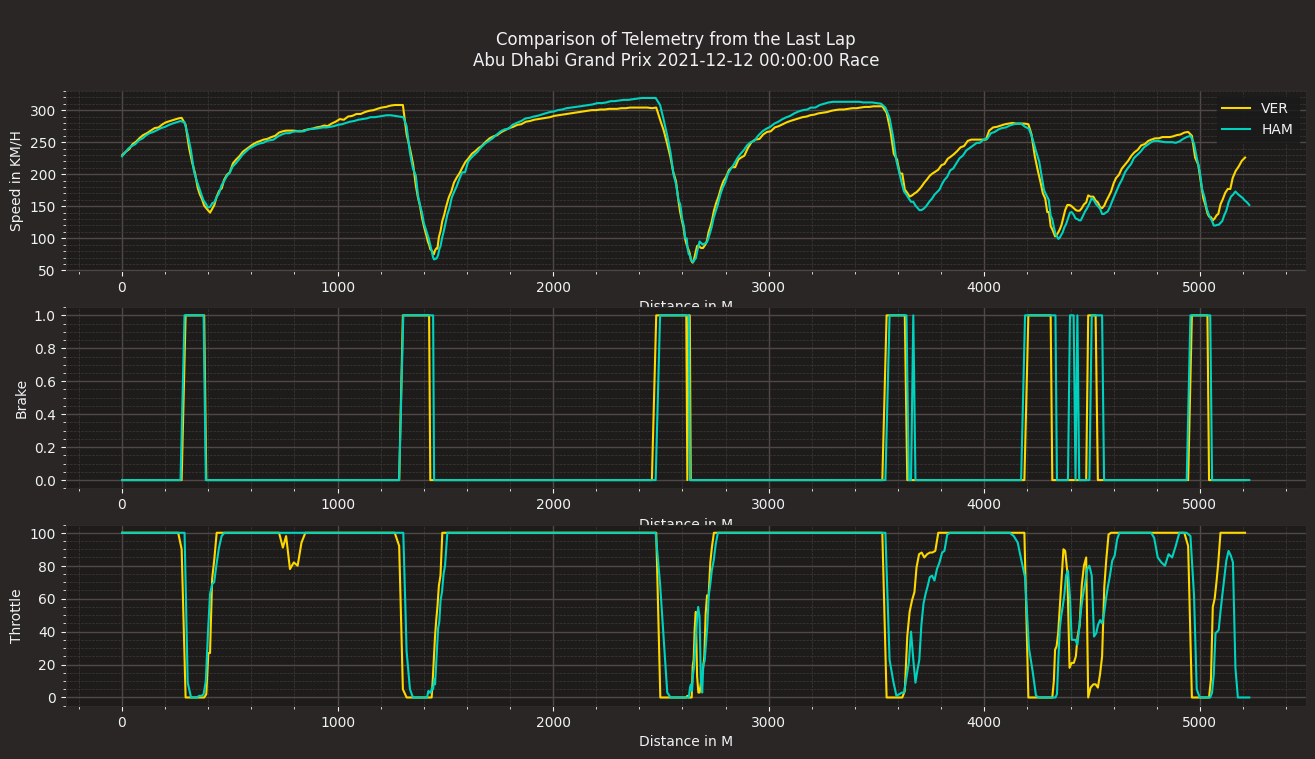

In [103]:
plt.rcParams['figure.figsize'] = [16,8]
fig, ax = plt.subplots(3)

fig.suptitle('Comparison of Telemetry from the Last Lap')

ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=rbr_color)
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM', color=mer_color)
ax[0].set_xlabel('Distance in M')
ax[0].set_ylabel('Speed in KM/H')
ax[0].legend()

ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label='VER', color=rbr_color)
ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label='HAM', color=mer_color)
ax[1].set_xlabel('Distance in M')
ax[1].set_ylabel('Brake')

ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label='VER', color=rbr_color)
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM', color=mer_color)
ax[2].set_xlabel('Distance in M')
ax[2].set_ylabel('Throttle')

plt.suptitle(f"""
    Comparison of Telemetry from the Last Lap
    {race.event['EventName']} {race.event['EventDate']} Race
""")

plt.show()

In [93]:
dir(race)

['_QUALI_LIKE_SESSIONS',
 '_RACE_LIKE_SESSIONS',
 '_Session__fix_tyre_info',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_first_lap_time_from_ergast',
 '_add_track_status_to_laps',
 '_calculate_quali_like_session_results',
 '_calculate_t0_date',
 '_car_data',
 '_check_lap_accuracy',
 '_drivers_from_f1_api',
 '_drivers_results_from_ergast',
 '_ergast',
 '_fix_missing_laps_retired_on_track',
 '_get_property_warn_not_loaded',
 '_laps',
 '_load_drivers_results',
 '_load_laps_data',
 '_load_race_control_messages',
 '_load_session_info',
 '_load_session_status_data',
 '_load_telemetry',
 '_load_total_lap_count',
 '_load_track_status_data',
 '_load_w

In [94]:
race.event

RoundNumber                                                         22
Country                                                      Abu Dhabi
Location                                                    Yas Island
OfficialEventName    FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate                                          2021-12-12 00:00:00
EventName                                         Abu Dhabi Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2021-12-10 13:30:00+04:00
Session1DateUtc                                    2021-12-10 09:30:00
Session2                                                    Practice 2
Session2Date                                 2021-12-10 17:00:00+04:00
Session2DateUtc                                    2021-12-10 13:00:00
Session3                                                    Practice 3
Sessio

In [95]:
race.event['EventDate']

Timestamp('2021-12-12 00:00:00')